In [1]:
# data
import pandas as pd
import numpy as np
pd.set_option('display.precision',3)

In [2]:
df = pd.DataFrame({
    "Chest Pain" : [1,0,1,1,0,0,1,1],
    "Blocked Arteries": [1,1,0,1,1,1,0,1],
    "Patient Weight": [205, 180, 210, 167, 156, 125, 168, 172],
    "Heart Disease": [1,1,1,1,0,0,0,0]
})
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease
0           1                 1             205              1
1           0                 1             180              1
2           1                 0             210              1
3           1                 1             167              1
4           0                 1             156              0
5           0                 1             125              0
6           1                 0             168              0
7           1                 1             172              0

In [3]:
totalGini = {}

{'Patient Weight': 0.19999999999999996}

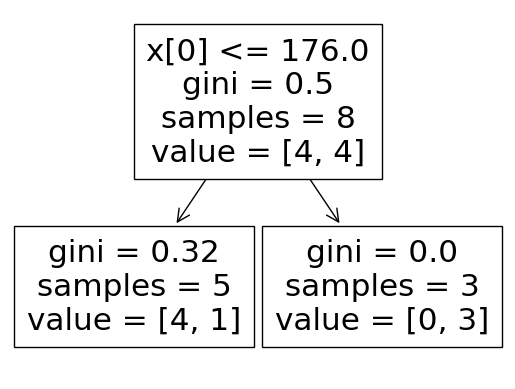

In [4]:
from sklearn import tree

feature = 'Patient Weight' # 'Blocked Arteries' #'Chest Pain'
x = np.array(df[feature]).reshape(-1, 1)
y = np.array(df['Heart Disease'])

t1 = tree.DecisionTreeClassifier(max_depth=1)
v1 = t1.fit(x,y)
tree.plot_tree(t1)

[n,n1,n2] = t1.tree_.n_node_samples
[i, i1,i2] = t1.tree_.impurity

g = (n1*i1 + n2*i2)/n

totalGini[feature] = g
totalGini


In [7]:
treeForst = {}
treeForst[1] = {'tree': t1, 'amountOfSay': None}
treeForst

{1: {'tree': DecisionTreeClassifier(max_depth=1), 'amountOfSay': None}}

In [8]:
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease
0           1                 1             205              1
1           0                 1             180              1
2           1                 0             210              1
3           1                 1             167              1
4           0                 1             156              0
5           0                 1             125              0
6           1                 0             168              0
7           1                 1             172              0

In [9]:
df['prediction_t1'] = t1.predict(x)
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  prediction_t1
0           1                 1             205              1              1
1           0                 1             180              1              1
2           1                 0             210              1              1
3           1                 1             167              1              0
4           0                 1             156              0              0
5           0                 1             125              0              0
6           1                 0             168              0              0
7           1                 1             172              0              0

In [10]:
# initialize with equal weight
df['weight'] = 1/len(df)
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  prediction_t1  \
0           1                 1             205              1              1   
1           0                 1             180              1              1   
2           1                 0             210              1              1   
3           1                 1             167              1              0   
4           0                 1             156              0              0   
5           0                 1             125              0              0   
6           1                 0             168              0              0   
7           1                 1             172              0              0   

   weight  
0   0.125  
1   0.125  
2   0.125  
3   0.125  
4   0.125  
5   0.125  
6   0.125  
7   0.125

In [11]:
# total error = sum of weights of the misclassified data points
total_error = (df['weight'][df['Heart Disease'] != df['prediction_t1']]).sum()
total_error

0.125

In [12]:
# amount of say
t1_amount_of_say = 0.5*np.log((1-total_error)/total_error)
t1_amount_of_say

0.9729550745276566

In [13]:
# save it
treeForst[1]['amountOfSay'] = t1_amount_of_say
treeForst

{1: {'tree': DecisionTreeClassifier(max_depth=1),
  'amountOfSay': 0.9729550745276566}}

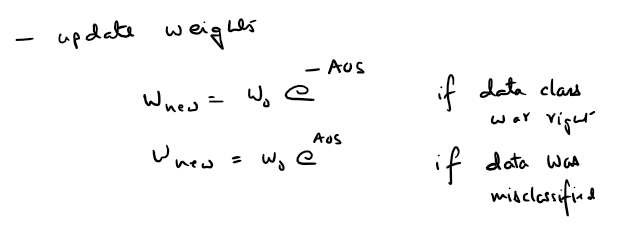

In [14]:
# update weight

df['weight_new'] = [df['weight'][i]*np.exp(-t1_amount_of_say) if df['Heart Disease'][i] == df['prediction_t1'][i]   else df['weight'][i]*np.exp(t1_amount_of_say) for i in range(len(df))]
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  prediction_t1  \
0           1                 1             205              1              1   
1           0                 1             180              1              1   
2           1                 0             210              1              1   
3           1                 1             167              1              0   
4           0                 1             156              0              0   
5           0                 1             125              0              0   
6           1                 0             168              0              0   
7           1                 1             172              0              0   

   weight  weight_new  
0   0.125       0.047  
1   0.125       0.047  
2   0.125       0.047  
3   0.125       0.331  
4   0.125       0.047  
5   0.125       0.047  
6   0.125       0.047  
7   0.125       0.047

In [15]:
# normalize the new weights
df['weight_new'] = df['weight_new']/df['weight_new'].sum()

In [16]:
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  prediction_t1  \
0           1                 1             205              1              1   
1           0                 1             180              1              1   
2           1                 0             210              1              1   
3           1                 1             167              1              0   
4           0                 1             156              0              0   
5           0                 1             125              0              0   
6           1                 0             168              0              0   
7           1                 1             172              0              0   

   weight  weight_new  
0   0.125       0.071  
1   0.125       0.071  
2   0.125       0.071  
3   0.125       0.500  
4   0.125       0.071  
5   0.125       0.071  
6   0.125       0.071  
7   0.125       0.071

In [17]:
# replace the old weights
df['weight'] = df['weight_new']
df.drop(columns=['weight_new'], inplace=True)
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  prediction_t1  \
0           1                 1             205              1              1   
1           0                 1             180              1              1   
2           1                 0             210              1              1   
3           1                 1             167              1              0   
4           0                 1             156              0              0   
5           0                 1             125              0              0   
6           1                 0             168              0              0   
7           1                 1             172              0              0   

   weight  
0   0.071  
1   0.071  
2   0.071  
3   0.500  
4   0.071  
5   0.071  
6   0.071  
7   0.071

In [28]:
# resample the data with new weights of equal length
import random
t2_datachoices = random.choices(population = range(len(df)), weights = df['weight'] , k = len(df) )
t2_datachoices

[2, 3, 3, 3, 7, 3, 7, 3]

In [29]:
df

Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  prediction_t1  \
0           1                 1             205              1              1   
1           0                 1             180              1              1   
2           1                 0             210              1              1   
3           1                 1             167              1              0   
4           0                 1             156              0              0   
5           0                 1             125              0              0   
6           1                 0             168              0              0   
7           1                 1             172              0              0   

   weight  
0   0.071  
1   0.071  
2   0.071  
3   0.500  
4   0.071  
5   0.071  
6   0.071  
7   0.071

In [30]:
# reset the data as data points from df of above rows 
dfnew = df.loc[t2_datachoices]
dfnew.reset_index(inplace=True)
dfnew

index  Chest Pain  Blocked Arteries  Patient Weight  Heart Disease  \
0      2           1                 0             210              1   
1      3           1                 1             167              1   
2      3           1                 1             167              1   
3      3           1                 1             167              1   
4      7           1                 1             172              0   
5      3           1                 1             167              1   
6      7           1                 1             172              0   
7      3           1                 1             167              1   

   prediction_t1  weight  
0              1   0.071  
1              0   0.500  
2              0   0.500  
3              0   0.500  
4              0   0.071  
5              0   0.500  
6              0   0.071  
7              0   0.500

# Repeat with making several stumps and picking the on with lowest gini

In [31]:
totalGini = {}

{'Patient Weight': 0.16666666666666666}

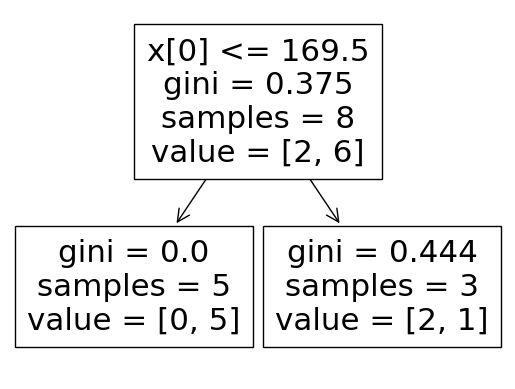

In [34]:
feature = 'Patient Weight' # 'Blocked Arteries' #'Chest Pain'
x = np.array(dfnew[feature]).reshape(-1, 1)
y = np.array(dfnew['Heart Disease'])

t1 = tree.DecisionTreeClassifier(max_depth=1)
v1 = t1.fit(x,y)
tree.plot_tree(t1)

[n,n1,n2] = t1.tree_.n_node_samples
[i, i1,i2] = t1.tree_.impurity

g = (n1*i1 + n2*i2)/n

totalGini[feature] = g
totalGini


# Sklearn built in Adaboost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()


df = pd.DataFrame({
    "Chest Pain" : [1,0,1,1,0,0,1,1],
    "Blocked Arteries": [1,1,0,1,1,1,0,1],
    "Patient Weight": [205, 180, 210, 167, 156, 125, 168, 172],
    "Heart Disease": [1,1,1,1,0,0,0,0]
})

x = np.array(df.drop(columns="Heart Disease"))
y = np.array(df["Heart Disease"])

clf.fit(x,y)


AdaBoostClassifier()

In [38]:
clf.predict(x)

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

# Sklearn AdaBoost on bigger data

In [41]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)

DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

df = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")
df.tail()

Age      Workclass  fnlwgt    Education  Education_Num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            Martial_Status          Occupation Relationship    Race      Sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_Gain  Capital_Loss  Hours_per_week         Country  Target  
32556             0             0              38   United-States   <=50K  
32557             0             0              40   United-States    >50K  
32558             0             0              40   United-States   <=50K  
32559             0             0              20   United-States   <=50K  
32560         15024             0              40   United-States    >50K

In [42]:
df.drop(columns=['Workclass', 'Occupation', 'Country'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Martial_Status  32561 non-null  object
 5   Relationship    32561 non-null  object
 6   Race            32561 non-null  object
 7   Sex             32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_per_week  32561 non-null  int64 
 11  Target          32561 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [43]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [44]:
df['TargetNew'] = df['Target'].map({' <=50K':0, ' >50K':1 })
df

Age  fnlwgt    Education  Education_Num       Martial_Status  \
0       39   77516    Bachelors             13        Never-married   
1       50   83311    Bachelors             13   Married-civ-spouse   
2       38  215646      HS-grad              9             Divorced   
3       53  234721         11th              7   Married-civ-spouse   
4       28  338409    Bachelors             13   Married-civ-spouse   
...    ...     ...          ...            ...                  ...   
32556   27  257302   Assoc-acdm             12   Married-civ-spouse   
32557   40  154374      HS-grad              9   Married-civ-spouse   
32558   58  151910      HS-grad              9              Widowed   
32559   22  201490      HS-grad              9        Never-married   
32560   52  287927      HS-grad              9   Married-civ-spouse   

         Relationship    Race      Sex  Capital_Gain  Capital_Loss  \
0       Not-in-family   White     Male          2174             0   
1             Husband   White     Male             0             0   
2       Not-in-family   White     Male             0             0   
3             Husband   Black     Male             0             0   
4                Wife   Black   Female             0             0   
...               ...     ...      ...           ...           ...   
32556            Wife   White   Female             0             0   
32557         Husband   White     Male             0             0   
32558       Unmarried   White   Female             0             0   
32559       Own-child   White     Male             0             0   
32560            Wife   White   Female         15024             0   

       Hours_per_week  Target  TargetNew  
0                  40   <=50K          0  
1                  13   <=50K          0  
2                  40   <=50K          0  
3                  40   <=50K          0  
4                  40   <=50K          0  
...               ...     ...        ...  
32556              38   <=50K          0  
32557              40    >50K          1  
32558              40   <=50K          0  
32559              20   <=50K          0  
32560              40    >50K          1  

[32561 rows x 13 columns]

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [48]:
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [49]:
y_train_predict = adb.predict(x_train)

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [51]:
confusion_matrix(y_train,y_train_predict)

array([[18434,  1376],
       [ 3811,  2427]], dtype=int64)

In [52]:
accuracy_score(y_train,y_train_predict)

0.800867628992629

In [53]:
y_test_predict = adb.predict(x_test)
accuracy_score(y_test,y_test_predict)

0.7991708889912482

## The low variance is impressive